In [1]:
# -- View Topology of Network
# Lighter color connections are connected to earlier layers (NOT weight strength)
import vis as nv
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

from sklearn.decomposition import PCA
# from sklearn.cross_decomposition import PLSRegression
# from sklearn.preprocessing import StandardScaler

# of Connections in ANN:  12


(<Figure size 1000x1000 with 1 Axes>, <AxesSubplot:>)

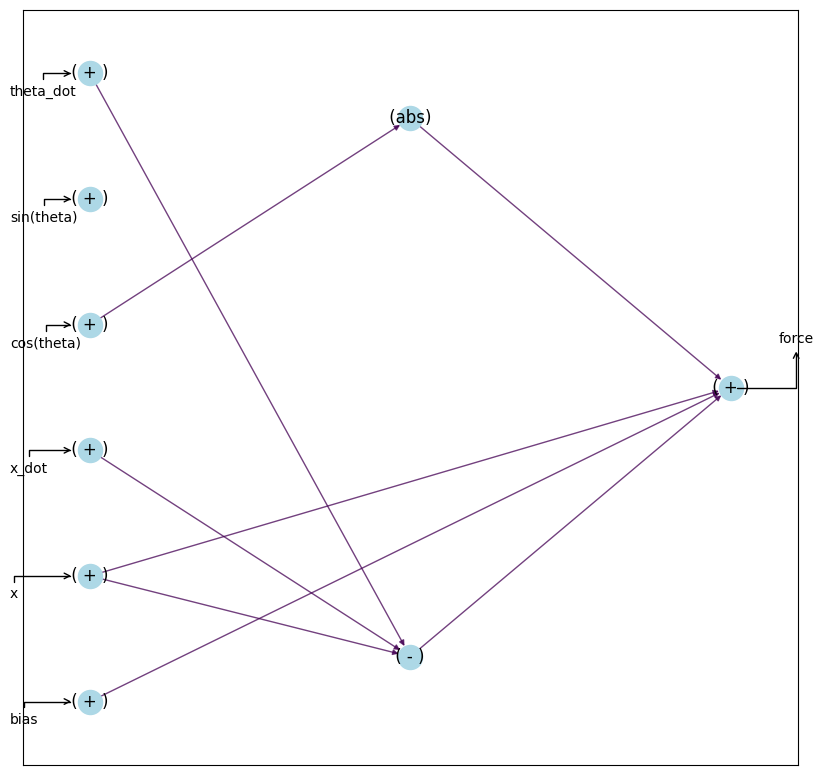

In [2]:
nv.viewInd('log/count_best.out','swingup')

# of Connections in ANN:  8


(<Figure size 1000x1000 with 1 Axes>, <AxesSubplot:>)

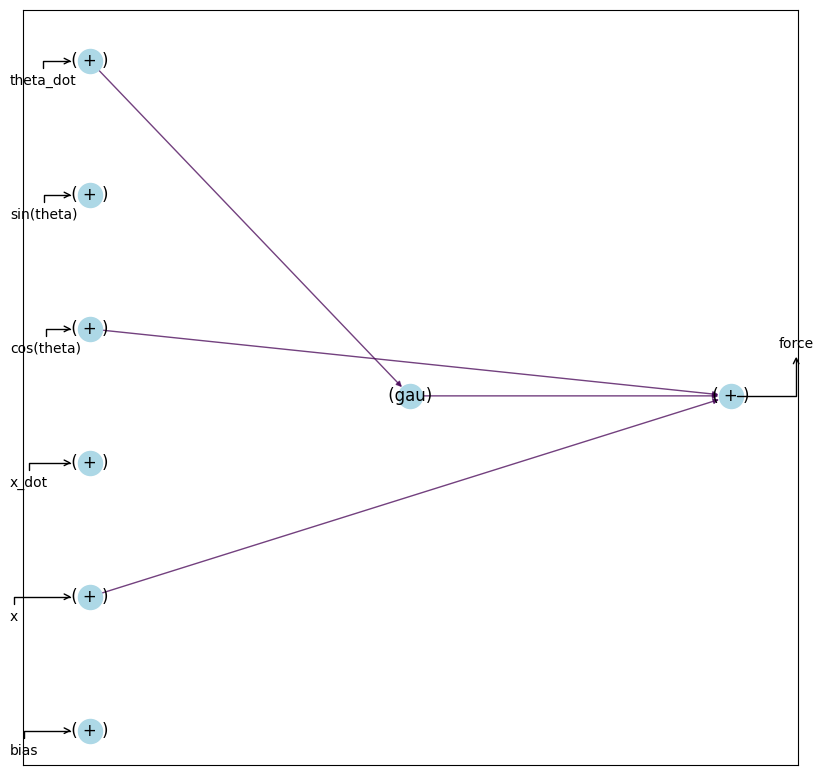

In [3]:
nv.viewInd('log/stats_best.out','swingup')

In [4]:
figsize_y = 4
figsize_x = 8
legend_distance = -0.35
weights = np.array([-2.,  -1.5, -1.,  -0.5,  0.5,  1.,   1.5,  2.])

In [5]:
# Load stats:
"""
# Rows: [generations]
# Cols:
0: evaluations (one evaluation of one individual -- may be multiple rollouts)
1: median fitness 
2: median count
3: best count 
4: elite count
5: 
6: top fitness (best fitness ever)
7: peak fitness (fitness earned with best single weight value by max individual)
8: median kl div
9: best kl div
10: elite kl div
11: median # of nodes in population
12: median # of connections in population]
"""
fail_count = np.loadtxt('log/count_stats.out', delimiter=',') 
kl_div = np.loadtxt('log/stats_stats.out', delimiter=',') 


Text(0.5, 1.0, 'All methods - Median Number (#) of Nodes in Population')

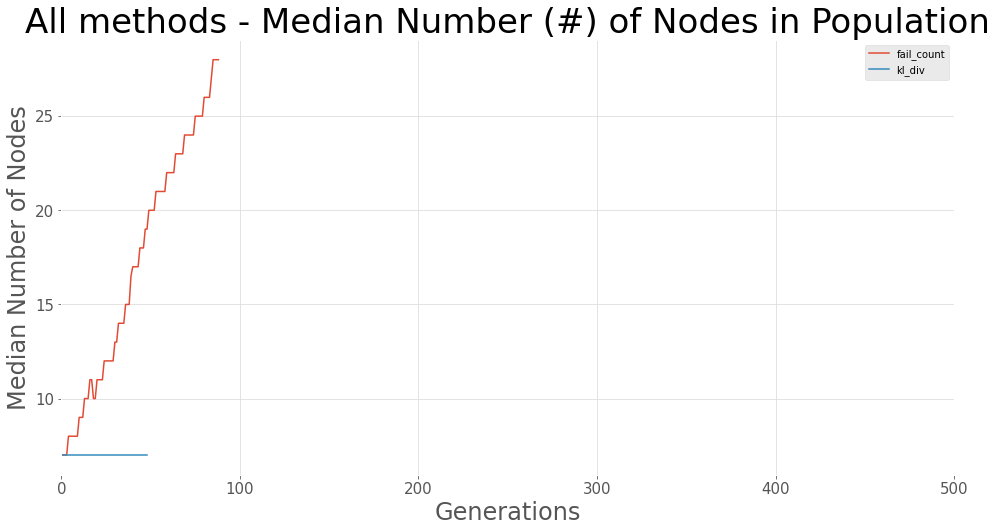

In [6]:
# with plt.xkcd():
# Plot fitness progress:

plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)


plt.plot(fail_count[:,11], label="fail_count")#, lw=1, marker='^', ms=4) # triangle
plt.plot(kl_div[:,11], label="kl_div")#, lw=1, marker='o', ms=4) # circle

# lg = plt.legend(bbox_to_anchor=(-0.07, legend_distance, 1.95, .02), loc='lower left', frameon=False,
#            ncol=4, borderaxespad=0., facecolor="white", fontsize = 20)
plt.grid(True)
plt.legend()
plt.xlabel('Generations', fontsize = 24) 
plt.ylabel('Median Number of Nodes', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 

axes = plt.gca()
# axes.set_xlim([0,500])
ax.set_xbound(lower=0.0, upper=500)
# 
plt.savefig('images/all_methods_number_nodes.png',dpi=300, 
            format='png', 
#             bbox_extra_artists=(lg,), 
            bbox_inches='tight')
plt.title('All methods - Median Number (#) of Nodes in Population', fontsize = 34) 

Text(0.5, 1.0, 'All methods - Median Number (#) of connections in Population')

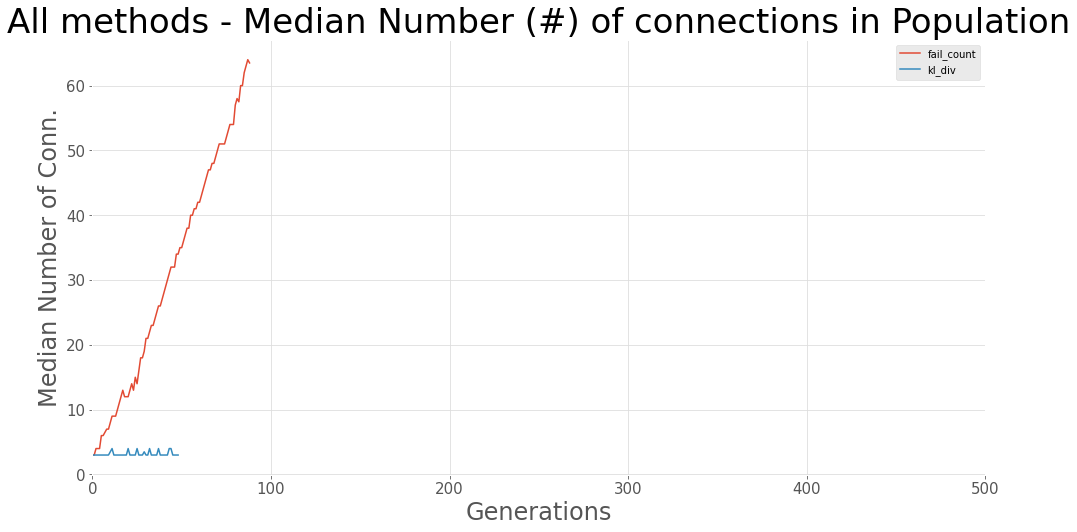

In [7]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)


plt.plot(fail_count[:,12], label="fail_count")#, lw=1, marker='^', ms=4) # triangle
plt.plot(kl_div[:,12], label="kl_div")#, lw=1, marker='o', ms=4) # circle


# lg = plt.legend(bbox_to_anchor=(-0.07, legend_distance, 1.95, .02), loc='lower left', frameon=False,
#            ncol=4, borderaxespad=0., facecolor="white", fontsize = 20)
plt.grid(True)
plt.legend()

plt.xlabel('Generations', fontsize = 24) 
plt.ylabel('Median Number of Conn.', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 

axes = plt.gca()
# axes.set_xlim([0,500])
ax.set_xbound(lower=0.0, upper=500)

plt.savefig('images/all_methods_number_conn.png',dpi=300, 
            format='png', 
#             bbox_extra_artists=(lg,),
            bbox_inches='tight')
plt.title('All methods - Median Number (#) of connections in Population', fontsize = 34) 

Text(0.5, 1.0, 'All methods - Median Reward')

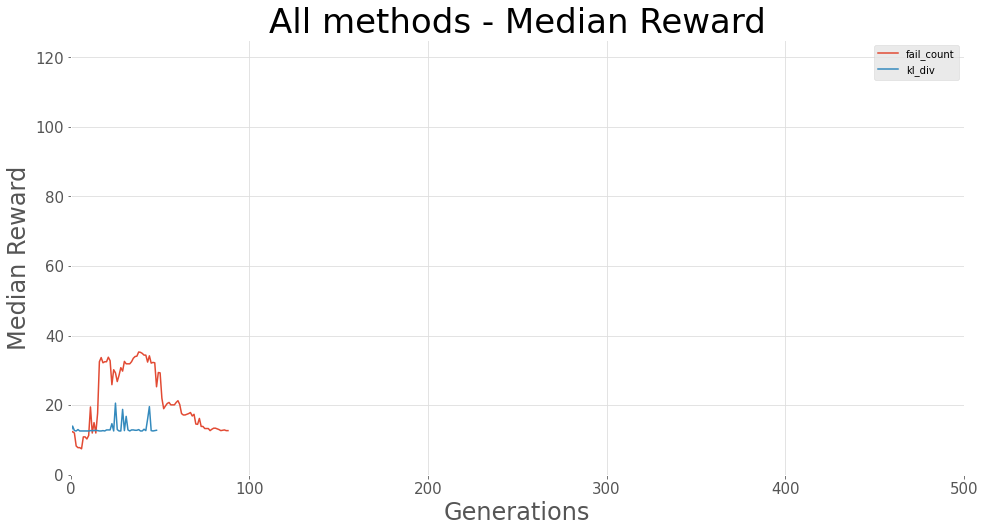

In [8]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)


plt.plot(fail_count[:,1], label="fail_count")#, lw=1, marker='^', ms=4) # triangle
plt.plot(kl_div[:,1], label="kl_div")#, lw=1, marker='o', ms=4) # square
# plt.plot(wann[:,1], label="WANN")#, lw=1, marker='D', ms=4) # square

# lg = plt.legend(bbox_to_anchor=(-0.07, legend_distance, 1.95, .02), loc='lower left', frameon=False,
#            ncol=4, borderaxespad=0., facecolor="white", fontsize = 20)
plt.grid(True)
plt.legend()

plt.xlabel('Generations', fontsize = 24) 
plt.ylabel('Median Reward', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 



axes = plt.gca()
# axes.set_xlim([0,500])
ax.set_xbound(lower=0.0, upper=500)
ax.set_ybound(lower=0.0, upper=125)

# plt.savefig('images/all_methods_median_reward.png',dpi=300, 
#             format='png', 
# #             bbox_extra_artists=(lg,),
#             bbox_inches='tight')

plt.title('All methods - Median Reward', fontsize = 34) 

Text(0.5, 1.0, 'All methods - Reward of The Best Agent')

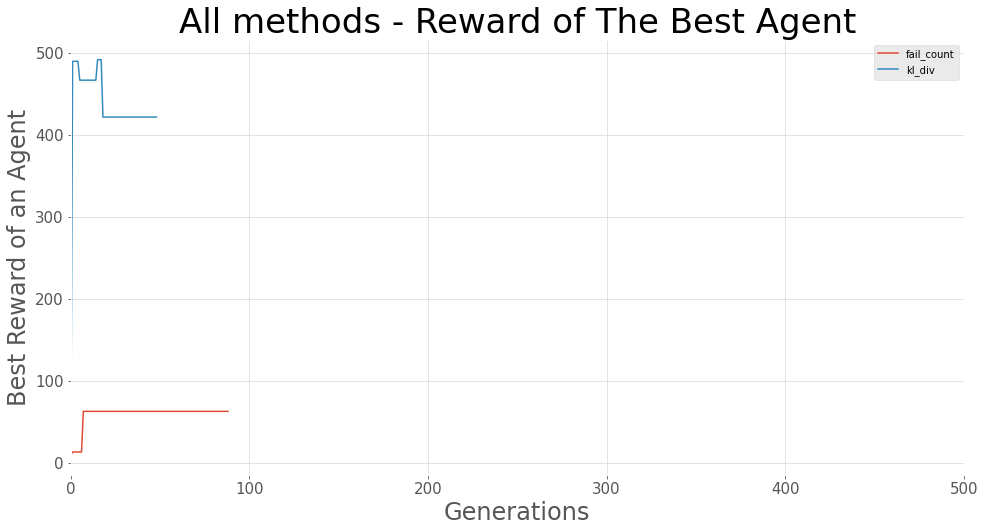

In [9]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)

plt.plot(fail_count[:,7], label="fail_count")#, lw=1, marker='^', ms=4) # triangle
plt.plot(kl_div[:,7], label="kl_div")#, lw=1, marker='o', ms=4) # square

# lg = plt.legend(bbox_to_anchor=(-0.07, legend_distance, 1.95, .02), loc='lower left', frameon=False,
#            ncol=4, borderaxespad=0., facecolor="white", fontsize = 20)
plt.grid(True)
plt.legend()

plt.xlabel('Generations', fontsize = 24) 
plt.ylabel('Best Reward of an Agent', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15)

axes = plt.gca()
# axes.set_xlim([0,500])
ax.set_xbound(lower=0.0, upper=500)
# ax.set_ybound(lower=0.0, upper=125)


# plt.savefig('images/all_methods_peak_reward.png',dpi=300, 
#             format='png', 
# #             bbox_extra_artists=(lg,),
#             bbox_inches='tight')


plt.title('All methods - Reward of The Best Agent', fontsize = 34) 

Text(0.5, 1.0, 'All methods - Best Family Reward')

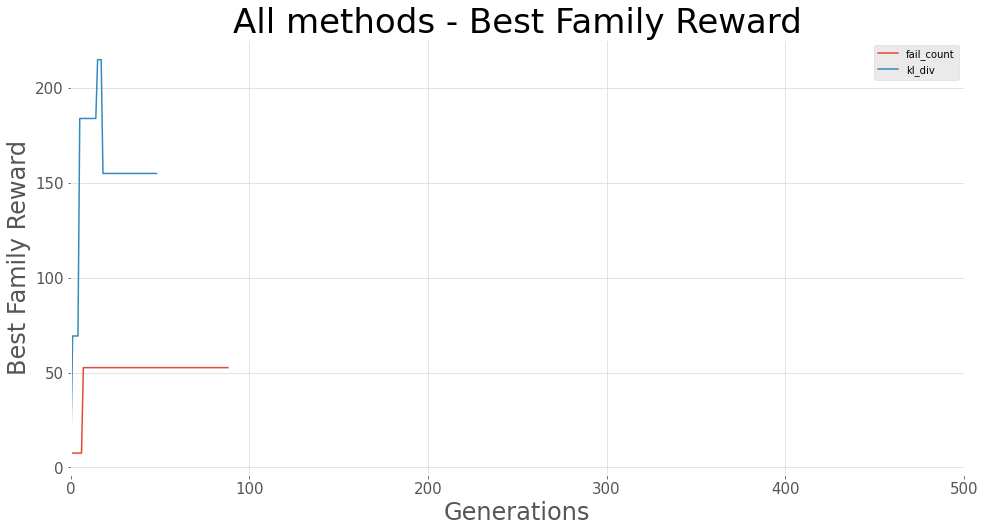

In [10]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)

plt.plot(fail_count[:,6], label="fail_count")#, lw=1, marker='^', ms=4) # triangle
plt.plot(kl_div[:,6], label="kl_div")#, lw=1, marker='^', ms=4) # square

# lg = plt.legend(bbox_to_anchor=(-0.07, legend_distance, 1.95, .02), loc='lower left', frameon=False,
#            ncol=4, borderaxespad=0., facecolor="white", fontsize = 20)
plt.grid(True)
plt.legend()

plt.xlabel('Generations', fontsize = 24) 
plt.ylabel('Best Family Reward', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15)


axes = plt.gca()
axes = plt.gca()
# axes.set_xlim([0,500])
ax.set_xbound(lower=0.0, upper=500)
# ax.set_ybound(lower=0.0, upper=135)


# plt.savefig('images/all_methods_best_family_reward.png',dpi=300, 
#             format='png', 
# #             bbox_extra_artists=(lg,),
#             bbox_inches='tight')

plt.title('All methods - Best Family Reward', fontsize = 34) 

Text(0.5, 1.0, 'All methods - Best KL')

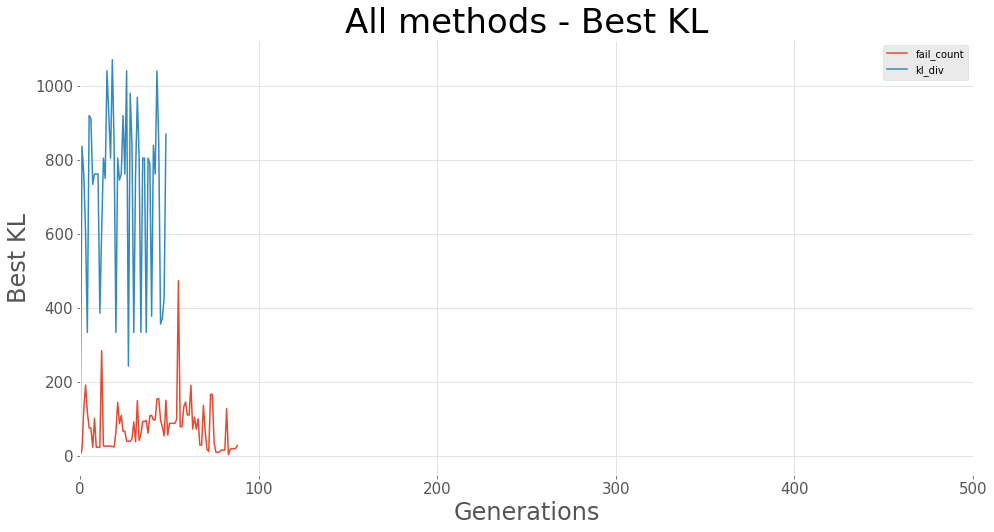

In [11]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)

plt.plot(fail_count[:,9], label="fail_count")#, lw=1, marker='^', ms=4) # triangle
plt.plot(kl_div[:,9], label="kl_div")#, lw=1, marker='^', ms=4) # square

# lg = plt.legend(bbox_to_anchor=(-0.07, legend_distance, 1.95, .02), loc='lower left', frameon=False,
#            ncol=4, borderaxespad=0., facecolor="white", fontsize = 20)
plt.grid(True)
plt.legend()

plt.xlabel('Generations', fontsize = 24) 
plt.ylabel('Best KL', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15)


axes = plt.gca()
axes = plt.gca()
# axes.set_xlim([0,500])
ax.set_xbound(lower=0.0, upper=500)
# ax.set_ybound(lower=0.0, upper=135)


# plt.savefig('images/all_methods_best_family_reward.png',dpi=300, 
#             format='png', 
# #             bbox_extra_artists=(lg,),
#             bbox_inches='tight')

plt.title('All methods - Best KL', fontsize = 34) 

Text(0.5, 1.0, 'All methods - Elite KL')

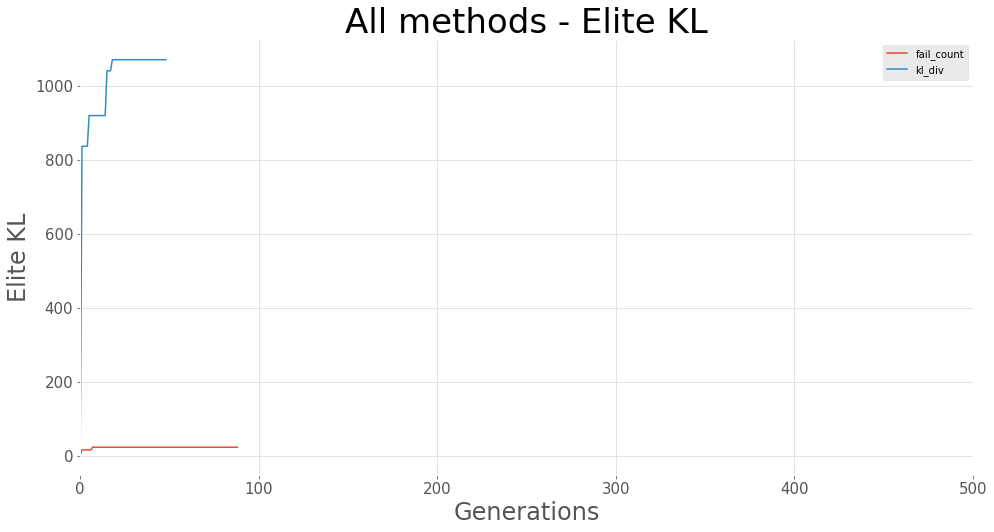

In [12]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)

plt.plot(fail_count[:,10], label="fail_count")#, lw=1, marker='^', ms=4) # triangle
plt.plot(kl_div[:,10], label="kl_div")#, lw=1, marker='^', ms=4) # square

# lg = plt.legend(bbox_to_anchor=(-0.07, legend_distance, 1.95, .02), loc='lower left', frameon=False,
#            ncol=4, borderaxespad=0., facecolor="white", fontsize = 20)
plt.grid(True)
plt.legend()

plt.xlabel('Generations', fontsize = 24) 
plt.ylabel('Elite KL', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15)


axes = plt.gca()
axes = plt.gca()
# axes.set_xlim([0,500])
ax.set_xbound(lower=0.0, upper=500)
# ax.set_ybound(lower=0.0, upper=135)


# plt.savefig('images/all_methods_best_family_reward.png',dpi=300, 
#             format='png', 
# #             bbox_extra_artists=(lg,),
#             bbox_inches='tight')

plt.title('All methods - Elite KL', fontsize = 34) 

Text(0.5, 1.0, 'All methods - Elite Count')

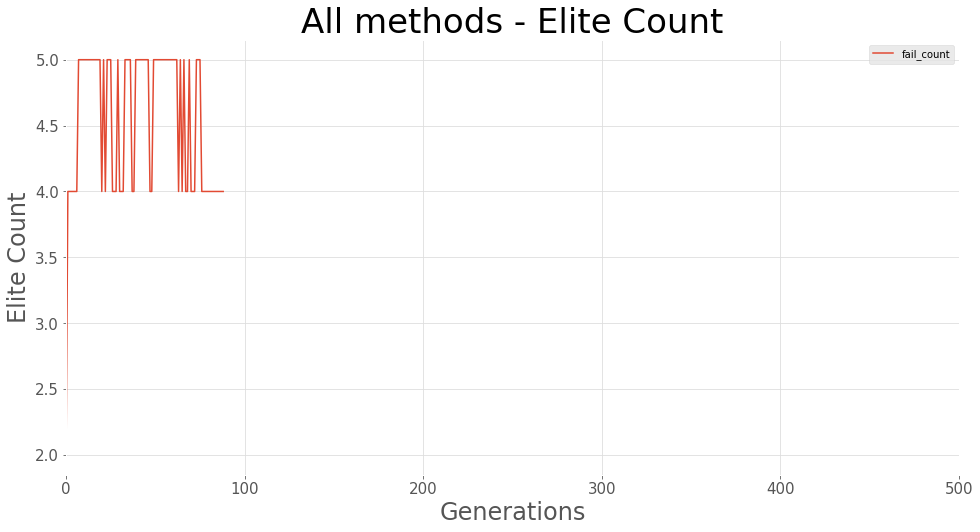

In [13]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)

plt.plot(fail_count[:,4], label="fail_count")#, lw=1, marker='^', ms=4) # triangle
# plt.plot(kl_div[:,4], label="kl_div")#, lw=1, marker='^', ms=4) # square

# lg = plt.legend(bbox_to_anchor=(-0.07, legend_distance, 1.95, .02), loc='lower left', frameon=False,
#            ncol=4, borderaxespad=0., facecolor="white", fontsize = 20)
plt.grid(True)
plt.legend()

plt.xlabel('Generations', fontsize = 24) 
plt.ylabel('Elite Count', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15)


axes = plt.gca()
# axes.set_xlim([0,500])
ax.set_xbound(lower=0.0, upper=500)
# ax.set_ybound(lower=0.0, upper=135)


# plt.savefig('images/all_methods_best_family_reward.png',dpi=300, 
#             format='png', 
# #             bbox_extra_artists=(lg,),
#             bbox_inches='tight')

plt.title('All methods - Elite Count', fontsize = 34) 

Text(0.5, 1.0, 'All methods - Median KL')

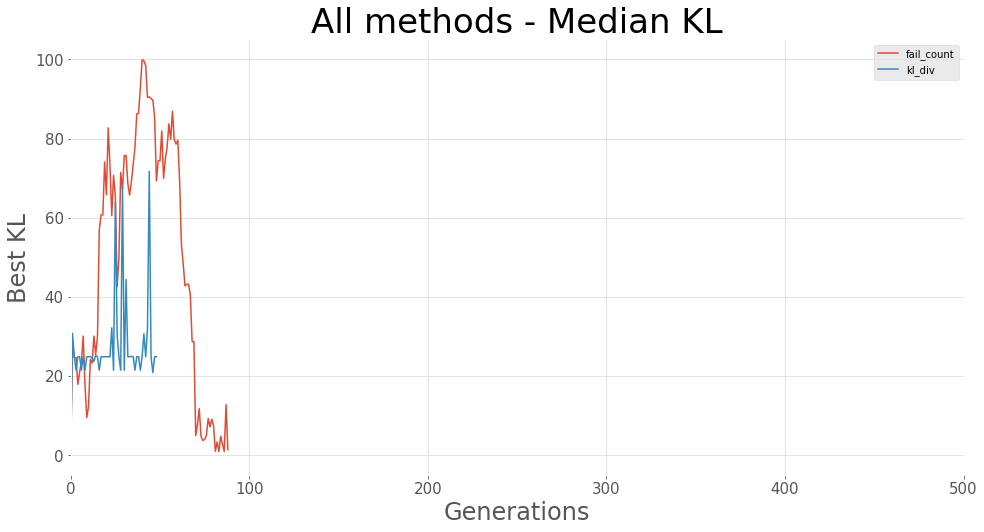

In [14]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)

plt.plot(fail_count[:,8], label="fail_count")#, lw=1, marker='^', ms=4) # triangle
plt.plot(kl_div[:,8], label="kl_div")#, lw=1, marker='^', ms=4) # square

# lg = plt.legend(bbox_to_anchor=(-0.07, legend_distance, 1.95, .02), loc='lower left', frameon=False,
#            ncol=4, borderaxespad=0., facecolor="white", fontsize = 20)
plt.grid(True)
plt.legend()

plt.xlabel('Generations', fontsize = 24) 
plt.ylabel('Best KL', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15)


axes = plt.gca()
axes = plt.gca()
# axes.set_xlim([0,500])
ax.set_xbound(lower=0.0, upper=500)
# ax.set_ybound(lower=0.0, upper=135)


# plt.savefig('images/all_methods_best_family_reward.png',dpi=300, 
#             format='png', 
# #             bbox_extra_artists=(lg,),
#             bbox_inches='tight')

plt.title('All methods - Median KL', fontsize = 34) 

In [15]:
!python3 fdm_test.py -p p/swingup_stats.json -i log/stats_best.out --nReps 10 --nVals 8 --view False -o kl_div
!python3 fdm_test.py -p p/swingup_count.json -i log/count_best.out --nReps 10 --nVals 8 --view False -o count

Traceback (most recent call last):
  File "fdm_test.py", line 114, in <module>
    main(args)                             
  File "fdm_test.py", line 47, in main
    lsave('behaviour/'+outPref+'_cos_'+str(i)+'.out',np.hstack(cos[i]))    
  File "<__array_function__ internals>", line 5, in hstack
TypeError: dispatcher for __array_function__ did not return an iterable


In [16]:
reward_kl_div = np.loadtxt('test_log/kl_div_reward.out', delimiter=',') 
std_kl_div = np.loadtxt('test_log/kl_div_std.out', delimiter=',')

reward_count = np.loadtxt('test_log/count_reward.out', delimiter=',') 
std_count = np.loadtxt('test_log/count_std.out', delimiter=',')

OSError: test_log/count_reward.out not found.

In [ ]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
xi = list(range(len(weights)))


plt.plot(xi,reward_kl_div, label="kl_div", alpha = 0.7)
plt.fill_between(xi, reward_kl_div+std_kl_div, reward_kl_div-std_kl_div, alpha = 0.7)
plt.plot(xi,reward_count, label="Count", alpha = 0.7)
plt.fill_between(xi, reward_count+std_count, reward_count-std_count, alpha = 0.7)

plt.grid(True)
plt.legend()

plt.xlabel('Weights', fontsize = 24) 
plt.ylabel('Performance', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15)

plt.xticks(xi,weights)

# plt.savefig('images/all_methods_weights_vs_rewards.png',dpi=300, 
#             format='png', 
#             bbox_inches='tight')


plt.title('All methods - Performance - Noise = 0')

In [ ]:
ang_kl_div_1 = np.loadtxt('behaviour/kl_div_ang_value_1.out', delimiter=',') 
ang_count_1 = np.loadtxt('behaviour/count_ang_value_1.out', delimiter=',') 

ang_kl_div_2 = np.loadtxt('behaviour/kl_div_ang_value_2.out', delimiter=',') 
ang_count_2 = np.loadtxt('behaviour/count_ang_value_2.out', delimiter=',') 

ang_kl_div_3 = np.loadtxt('behaviour/kl_div_ang_value_3.out', delimiter=',') 
ang_count_3 = np.loadtxt('behaviour/count_ang_value_3.out', delimiter=',') 

ang_kl_div_4 = np.loadtxt('behaviour/kl_div_ang_value_4.out', delimiter=',') 
ang_count_4 = np.loadtxt('behaviour/count_ang_value_4.out', delimiter=',') 

ang_kl_div_5 = np.loadtxt('behaviour/kl_div_ang_value_5.out', delimiter=',') 
ang_count_5 = np.loadtxt('behaviour/count_ang_value_5.out', delimiter=',') 

ang_kl_div_6 = np.loadtxt('behaviour/kl_div_ang_value_6.out', delimiter=',') 
ang_count_6 = np.loadtxt('behaviour/count_ang_value_6.out', delimiter=',') 

ang_kl_div_7 = np.loadtxt('behaviour/kl_div_ang_value_7.out', delimiter=',') 
ang_count_7 = np.loadtxt('behaviour/count_ang_value_7.out', delimiter=',') 

ang_kl_div_8 = np.loadtxt('behaviour/kl_div_ang_value_0.out', delimiter=',') 
ang_count_8 = np.loadtxt('behaviour/count_ang_value_0.out', delimiter=',') 

In [ ]:
pos_x_kl_div_1 = np.loadtxt('behaviour/kl_div_pos_x_1.out', delimiter=',') 
pos_x_count_1 = np.loadtxt('behaviour/count_pos_x_1.out', delimiter=',') 

pos_x_kl_div_2 = np.loadtxt('behaviour/kl_div_pos_x_2.out', delimiter=',') 
pos_x_count_2 = np.loadtxt('behaviour/count_pos_x_2.out', delimiter=',') 

pos_x_kl_div_3 = np.loadtxt('behaviour/kl_div_pos_x_3.out', delimiter=',') 
pos_x_count_3 = np.loadtxt('behaviour/count_pos_x_3.out', delimiter=',') 

pos_x_kl_div_4 = np.loadtxt('behaviour/kl_div_pos_x_4.out', delimiter=',') 
pos_x_count_4 = np.loadtxt('behaviour/count_pos_x_4.out', delimiter=',') 

pos_x_kl_div_5 = np.loadtxt('behaviour/kl_div_pos_x_5.out', delimiter=',') 
pos_x_count_5 = np.loadtxt('behaviour/count_pos_x_5.out', delimiter=',') 

pos_x_kl_div_6 = np.loadtxt('behaviour/kl_div_pos_x_6.out', delimiter=',') 
pos_x_count_6 = np.loadtxt('behaviour/count_pos_x_6.out', delimiter=',') 

pos_x_kl_div_7 = np.loadtxt('behaviour/kl_div_pos_x_7.out', delimiter=',') 
pos_x_count_7 = np.loadtxt('behaviour/count_pos_x_7.out', delimiter=',') 

pos_x_kl_div_8 = np.loadtxt('behaviour/kl_div_pos_x_0.out', delimiter=',') 
pos_x_count_8 = np.loadtxt('behaviour/count_pos_x_0.out', delimiter=',') 

In [ ]:
pos_x_p_kl_div_1 = np.array([math.cos(i)*0.6 for i in ang_kl_div_1])
pos_x_p_count_1 = np.array([math.cos(i)*0.6 for i in ang_count_1])

pos_x_p_kl_div_2 = np.array([math.cos(i)*0.6 for i in ang_kl_div_2])
pos_x_p_count_2 = np.array([math.cos(i)*0.6 for i in ang_count_2])

pos_x_p_kl_div_3 = np.array([math.cos(i)*0.6 for i in ang_kl_div_3])
pos_x_p_count_3 = np.array([math.cos(i)*0.6 for i in ang_count_3])

pos_x_p_kl_div_4 = np.array([math.cos(i)*0.6 for i in ang_kl_div_4])
pos_x_p_count_4 = np.array([math.cos(i)*0.6 for i in ang_count_4])

pos_x_p_kl_div_5 = np.array([math.cos(i)*0.6 for i in ang_kl_div_5])
pos_x_p_count_5 = np.array([math.cos(i)*0.6 for i in ang_count_5])

pos_x_p_kl_div_6 = np.array([math.cos(i)*0.6 for i in ang_kl_div_6])
pos_x_p_count_6 = np.array([math.cos(i)*0.6 for i in ang_count_6])

pos_x_p_kl_div_7 = np.array([math.cos(i)*0.6 for i in ang_kl_div_7])
pos_x_p_count_7 = np.array([math.cos(i)*0.6 for i in ang_count_7])

pos_x_p_kl_div_8 = np.array([math.cos(i)*0.6 for i in ang_kl_div_8])
pos_x_p_count_8 = np.array([math.cos(i)*0.6 for i in ang_count_8])

In [ ]:
pos_y_p_kl_div_1 = np.array([math.sin(i)*0.6 for i in ang_kl_div_1])
pos_y_p_count_1 = np.array([math.sin(i)*0.6 for i in ang_count_1])


pos_y_p_kl_div_2 = np.array([math.sin(i)*0.6 for i in ang_kl_div_2])
pos_y_p_count_2 = np.array([math.sin(i)*0.6 for i in ang_count_2])

pos_y_p_kl_div_3 = np.array([math.sin(i)*0.6 for i in ang_kl_div_3])
pos_y_p_count_3 = np.array([math.sin(i)*0.6 for i in ang_count_3])

pos_y_p_kl_div_4 = np.array([math.sin(i)*0.6 for i in ang_kl_div_4])
pos_y_p_count_4 = np.array([math.sin(i)*0.6 for i in ang_count_4])

pos_y_p_kl_div_5 = np.array([math.sin(i)*0.6 for i in ang_kl_div_5])
pos_y_p_count_5 = np.array([math.sin(i)*0.6 for i in ang_count_5])

pos_y_p_kl_div_6 = np.array([math.sin(i)*0.6 for i in ang_kl_div_6])
pos_y_p_count_6 = np.array([math.sin(i)*0.6 for i in ang_count_6])

pos_y_p_kl_div_7 = np.array([math.sin(i)*0.6 for i in ang_kl_div_7])
pos_y_p_count_7 = np.array([math.sin(i)*0.6 for i in ang_count_7])

pos_y_p_kl_div_8 = np.array([math.sin(i)*0.6 for i in ang_kl_div_8])
pos_y_p_count_8 = np.array([math.sin(i)*0.6 for i in ang_count_8])

In [ ]:
t_series_1_kl_div = pd.DataFrame([[pos_x_p_kl_div_1[i]+pos_x_kl_div_1[i], pos_y_p_kl_div_1[i]] for i in range(len(pos_x_p_kl_div_1))],columns=['X','Y'])
t_series_2_kl_div = pd.DataFrame([[pos_x_p_kl_div_2[i]+pos_x_kl_div_2[i], pos_y_p_kl_div_2[i]] for i in range(len(pos_x_p_kl_div_2))],columns=['X','Y'])
t_series_3_kl_div = pd.DataFrame([[pos_x_p_kl_div_3[i]+pos_x_kl_div_3[i], pos_y_p_kl_div_3[i]] for i in range(len(pos_x_p_kl_div_3))],columns=['X','Y'])
t_series_4_kl_div = pd.DataFrame([[pos_x_p_kl_div_4[i]+pos_x_kl_div_4[i], pos_y_p_kl_div_4[i]] for i in range(len(pos_x_p_kl_div_4))],columns=['X','Y'])
t_series_5_kl_div = pd.DataFrame([[pos_x_p_kl_div_5[i]+pos_x_kl_div_5[i], pos_y_p_kl_div_5[i]] for i in range(len(pos_x_p_kl_div_5))],columns=['X','Y'])
t_series_6_kl_div = pd.DataFrame([[pos_x_p_kl_div_6[i]+pos_x_kl_div_6[i], pos_y_p_kl_div_6[i]] for i in range(len(pos_x_p_kl_div_6))],columns=['X','Y'])
t_series_7_kl_div = pd.DataFrame([[pos_x_p_kl_div_7[i]+pos_x_kl_div_7[i], pos_y_p_kl_div_7[i]] for i in range(len(pos_x_p_kl_div_7))],columns=['X','Y'])
t_series_8_kl_div = pd.DataFrame([[pos_x_p_kl_div_8[i]+pos_x_kl_div_8[i], pos_y_p_kl_div_8[i]] for i in range(len(pos_x_p_kl_div_8))],columns=['X','Y'])


df = pd.DataFrame([t_series_1_kl_div.to_numpy().flatten(),
                t_series_2_kl_div.to_numpy().flatten(),
                t_series_3_kl_div.to_numpy().flatten(),
                t_series_4_kl_div.to_numpy().flatten(),
                t_series_5_kl_div.to_numpy().flatten(),
                t_series_6_kl_div.to_numpy().flatten(),
                t_series_7_kl_div.to_numpy().flatten(),
                t_series_8_kl_div.to_numpy().flatten()])

df3 = df.dropna(axis = 1, how = 'any')

ssd = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5)
    kmeans.fit(df3)
    ssd.append(kmeans.inertia_)

pca = PCA(n_components=2) 
    

df3 = pca.fit_transform(df3)
df3 = pd.DataFrame(df3)
df3 = df3.assign(Agent = [1,2,3,4,5,6,7,8])

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)

plt.plot(range(1, 9), ssd)
# plt.grid()
plt.title('The Elbow Method - kl_div', fontsize =20)
plt.xlabel('Number of clusters', fontsize =20)
plt.ylabel('Sum of squared distances',fontsize =20)

plt.show()

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)

# plt.figure(figsize=(25,10))
plt.scatter(df3.iloc[:,0],df3.iloc[:,1], s=300)
for i in range(0, 8):
     plt.text(df3.iloc[i,0],df3.iloc[i,1],df3.iloc[i,2])

axes = plt.gca()
ax.set_xbound(lower=-15, upper=15)
ax.set_ybound(lower=-6, upper=6)

plt.title('PCA -trajectories - kl_div', fontsize =20)

In [ ]:
t_series_1_count = pd.DataFrame([[pos_x_p_count_1[i]+pos_x_count_1[i], pos_y_p_count_1[i]] for i in range(len(pos_x_p_count_1))],columns=['X','Y'])
t_series_2_count = pd.DataFrame([[pos_x_p_count_2[i]+pos_x_count_2[i], pos_y_p_count_2[i]] for i in range(len(pos_x_p_count_2))],columns=['X','Y'])
t_series_3_count = pd.DataFrame([[pos_x_p_count_3[i]+pos_x_count_3[i], pos_y_p_count_3[i]] for i in range(len(pos_x_p_count_3))],columns=['X','Y'])
t_series_4_count = pd.DataFrame([[pos_x_p_count_4[i]+pos_x_count_4[i], pos_y_p_count_4[i]] for i in range(len(pos_x_p_count_4))],columns=['X','Y'])
t_series_5_count = pd.DataFrame([[pos_x_p_count_5[i]+pos_x_count_5[i], pos_y_p_count_5[i]] for i in range(len(pos_x_p_count_5))],columns=['X','Y'])
t_series_6_count = pd.DataFrame([[pos_x_p_count_6[i]+pos_x_count_6[i], pos_y_p_count_6[i]] for i in range(len(pos_x_p_count_6))],columns=['X','Y'])
t_series_7_count = pd.DataFrame([[pos_x_p_count_7[i]+pos_x_count_7[i], pos_y_p_count_7[i]] for i in range(len(pos_x_p_count_7))],columns=['X','Y'])
t_series_8_count = pd.DataFrame([[pos_x_p_count_8[i]+pos_x_count_8[i], pos_y_p_count_8[i]] for i in range(len(pos_x_p_count_8))],columns=['X','Y'])


df = pd.DataFrame([t_series_1_count.to_numpy().flatten(),
                t_series_2_count.to_numpy().flatten(),
                t_series_3_count.to_numpy().flatten(),
                t_series_4_count.to_numpy().flatten(),
                t_series_5_count.to_numpy().flatten(),
                t_series_6_count.to_numpy().flatten(),
                t_series_7_count.to_numpy().flatten(),
                t_series_8_count.to_numpy().flatten()])

df2 = df.dropna(axis = 1, how = 'any')

ssd2 = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5)
    kmeans.fit(df2)
    ssd2.append(kmeans.inertia_)

pca = PCA(n_components=2) 
    

df2 = pca.fit_transform(df2)
df2 = pd.DataFrame(df2)
df2 = df2.assign(Agent = [1,2,3,4,5,6,7,8])

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)

plt.plot(range(1, 9), ssd2)
# plt.grid()
plt.title('The Elbow Method - failure count', fontsize =20)
plt.xlabel('Number of clusters', fontsize =20)
plt.ylabel('Sum of squared distances',fontsize =20)

plt.show()

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)

# plt.figure(figsize=(25,10))
plt.scatter(df2.iloc[:,0],df2.iloc[:,1], s=300)
for i in range(0, 8):
     plt.text(df2.iloc[i,0],df2.iloc[i,1],df2.iloc[i,2])

axes = plt.gca()
ax.set_xbound(lower=-15, upper=15)
ax.set_ybound(lower=-6, upper=6)

plt.title('PCA -trajectories - failure count', fontsize =20)